In [1]:
import pandas as pd

url = "https://hbiostat.org/data/repo/titanic3.xls"
data = pd.read_excel(url)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
def data_transform(df,scale = "minmax"):
    excluir=['name', 'ticket', 'home.dest', 'boat', 'body', 'cabin']
    
    df = (df.drop(excluir,axis=1)
    .astype({'pclass':str})
    .pipe(pd.get_dummies, drop_first=True)#trata todas as variaveis dummies
    .dropna())
    
    # Normalizacao variavel numericas
    stats=[]
    for col in ["age",'sibsp',"parch","fare"]:
        if scale == "minmax":
            stats.append({col: [df[col].min(),df[col].max()]})
            df[col] =(df[col]-df[col].min())/(df[col].max()-df[col].min())
            
        else: 
            stats.append({col: [df[col].mean(),df[col].std()]})
            df[col] = (df[col]-df[col].mean())/df[col].std()
    
    return df,stats
    
data,stats= data_transform(df=data)

In [4]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
#Particao de Treino-Teste
y = data["survived"]
x = data.drop("survived",axis = 1)
X_train,X_test,y_train,y_test = model_selection.train_test_split(
    x,y,test_size=0.3,random_state=1)

model = LogisticRegression(random_state=1).fit(X_train,y_train)
model.score(X_test,y_test)

0.821656050955414

In [5]:
# Visualização dos parametros estimados
print(model.intercept_)
model.coef_

[3.13412267]


array([[-1.90680206, -1.30676778,  0.402362  ,  0.075018  , -0.79624885,
        -1.56225124, -2.18823488, -0.86525012, -0.64170652]])

In [6]:
from numpy import exp

def inv_logit(coef):
    return exp(coef)/(1+exp(coef))

inv_logit(model.coef_)

array([[0.12934055, 0.21302821, 0.59925502, 0.51874571, 0.3108285 ,
        0.17332385, 0.10081199, 0.29624361, 0.34486088]])

In [7]:
# Impressao dos coeficientes

cols_names = x.columns
name1="Coluna"
name2="Coeficiente"
name3="Probabilidade"
print(f"{name1:10}{name2:10} {name3:10}")

for col, val in sorted(
    zip(cols_names,model.coef_[0]), key=lambda x: x[1],reverse=True):
    
    print(f"{col:10}{val:10.3f} {inv_logit(val):10.3f}")

Coluna    Coeficiente Probabilidade
parch          0.402      0.599
fare           0.075      0.519
embarked_S    -0.642      0.345
pclass_2      -0.796      0.311
embarked_Q    -0.865      0.296
sibsp         -1.307      0.213
pclass_3      -1.562      0.173
age           -1.907      0.129
sex_male      -2.188      0.101


c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


FeatureImportances(ax=<Axes: >, estimator=LogisticRegression(random_state=1))

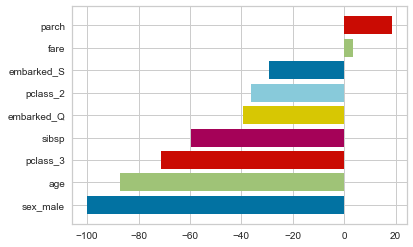

In [8]:
from yellowbrick.model_selection import FeatureImportances
fig = FeatureImportances(model)
fig.fit(X_train,y_train)

In [9]:
#Predições 

print(model.predict([x.loc[0]])) #classe
print(model.predict_proba([x.loc[0]])) # Probabilidade de morrer e sobreviver


[1]
[[0.13768124 0.86231876]]


c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\josed\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**APP** 



In [10]:
r = {
    "metodo": "logit",
    "resultados": model,
    "escala":stats,
    "acuracia": model.score(X_test,y_test)
    
}

import pickle
filename = 'modelo_titanic.pkl'
pickle.dump(r, open(filename, "wb"))

In [11]:
#carregar dados

load_model = pickle.load(open(filename,"rb"))
logit = load_model["resultados"]

idade = int(input("informe sua idade:"))
idade

12